In [1]:
import pandas as pd # Library to manipulate/analyze data
from matplotlib import pyplot as plt # Visualize data

In [11]:
pd.options.display.float_format = "{:.2f}".format # Makes pandas output fractions up to 2 decimal places
pd.options.display.max_rows = 100 # Output max of 15 rows
# Applied to the entire document!

The following is for cereal data from Kaggle for 77 cereals. Big question is if we can predict the correlation between rating and other features.

Data Collection

In [3]:
# The dataset is loaded from a URL.
cereal_data = pd.read_csv("https://cosmos-api-prod-datasetsbucket-iuph41amgzfj.s3.amazonaws.com/cereal.csv", sep=",")

# Gives the first 3 rows of data from document
cereal_data.head(3)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.00,5.00,6.00,280.00,25,3,1.00,0.33,68.40
1,100% Natural Bran,Q,C,120,3,5,15,2.00,8.00,8.00,135.00,0,3,1.00,1.00,33.98
2,All-Bran,K,C,70,4,1,260,9.00,7.00,5.00,320.00,25,3,1.00,0.33,59.43


Data Cleaning

In [4]:
# Gives descriptive stats like count(sum), mean, std for each column
descriptive_stats = cereal_data.describe()

# Variable name on last line of cell outputs value of variable
descriptive_stats

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.00,77.00,77.00,77.00,77.00,76.00,76.00,75.00,77.00,77.00,77.00,77.00,77.00
mean,106.88,2.55,1.01,159.68,2.15,14.80,7.03,98.67,28.25,2.21,1.03,0.82,42.67
std,19.48,1.09,1.01,83.83,2.38,3.91,4.38,70.41,22.34,0.83,0.15,0.23,14.05
min,50.00,1.00,0.00,0.00,0.00,5.00,0.00,15.00,0.00,1.00,0.50,0.25,18.04
25%,100.00,2.00,0.00,130.00,1.00,12.00,3.00,42.50,25.00,1.00,1.00,0.67,33.17
50%,110.00,3.00,1.00,180.00,2.00,14.50,7.00,90.00,25.00,2.00,1.00,0.75,40.40
75%,110.00,3.00,2.00,210.00,3.00,17.00,11.00,120.00,25.00,3.00,1.00,1.00,50.83
max,160.00,6.00,5.00,320.00,14.00,23.00,15.00,330.00,100.00,3.00,1.50,1.50,93.70


In [12]:
# Prints out the sum of how many columns have N/A, none, or a similar value filled in
cereal_data.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

There are four total missing values.
1 in 'carbo'
1 in 'sugars'
2 in 'potass'

Imputation - Replacing missing data with substituted calues

In [14]:
# Create a copy of data with missing values filled with zero
cereal_data_missing_zero_filled = cereal_data.fillna(0)

cereal_data_missing_zero_filled.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00
mean,106.88,2.55,1.01,159.68,2.15,14.61,6.94,96.10,28.25,2.21,1.03,0.82,42.67
std,19.48,1.09,1.01,83.83,2.38,4.23,4.42,71.25,22.34,0.83,0.15,0.23,14.05
min,50.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.50,0.25,18.04
25%,100.00,2.00,0.00,130.00,1.00,12.00,3.00,40.00,25.00,1.00,1.00,0.67,33.17
50%,110.00,3.00,1.00,180.00,2.00,14.00,7.00,90.00,25.00,2.00,1.00,0.75,40.40
75%,110.00,3.00,2.00,210.00,3.00,17.00,11.00,120.00,25.00,3.00,1.00,1.00,50.83
max,160.00,6.00,5.00,320.00,14.00,23.00,15.00,330.00,100.00,3.00,1.50,1.50,93.70


Notice all the missing values have been filled with zero. Counts are all 77.

In [16]:
# Create a copy of data with missing values filled with mean
cereal_data_missing_mean_filled = cereal_data.fillna(cereal_data.mean())

cereal_data_missing_mean_filled.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00
mean,106.88,2.55,1.01,159.68,2.15,14.80,7.03,98.67,28.25,2.21,1.03,0.82,42.67
std,19.48,1.09,1.01,83.83,2.38,3.88,4.35,69.48,22.34,0.83,0.15,0.23,14.05
min,50.00,1.00,0.00,0.00,0.00,5.00,0.00,15.00,0.00,1.00,0.50,0.25,18.04
25%,100.00,2.00,0.00,130.00,1.00,12.00,3.00,45.00,25.00,1.00,1.00,0.67,33.17
50%,110.00,3.00,1.00,180.00,2.00,14.80,7.00,90.00,25.00,2.00,1.00,0.75,40.40
75%,110.00,3.00,2.00,210.00,3.00,17.00,11.00,120.00,25.00,3.00,1.00,1.00,50.83
max,160.00,6.00,5.00,320.00,14.00,23.00,15.00,330.00,100.00,3.00,1.50,1.50,93.70


The missing values were filled with the mean for each column

In [19]:
cereal_data_missing_dropped = cereal_data.dropna()

cereal_data_missing_dropped.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00
mean,107.03,2.51,1.00,162.36,2.18,14.73,7.11,98.51,29.05,2.22,1.03,0.82,42.37
std,19.84,1.08,1.01,82.77,2.42,3.89,4.36,70.88,22.29,0.83,0.15,0.24,14.03
min,50.00,1.00,0.00,0.00,0.00,5.00,0.00,15.00,0.00,1.00,0.50,0.25,18.04
25%,100.00,2.00,0.00,135.00,0.25,12.00,3.00,41.25,25.00,1.25,1.00,0.67,32.45
50%,110.00,2.50,1.00,180.00,2.00,14.50,7.00,90.00,25.00,2.00,1.00,0.75,40.25
75%,110.00,3.00,1.00,217.50,3.00,17.00,11.00,120.00,25.00,3.00,1.00,1.00,50.52
max,160.00,6.00,5.00,320.00,14.00,23.00,15.00,330.00,100.00,3.00,1.50,1.50,93.70


The rows that contained a null value were dropped. Not recommended because data is lost.

In [22]:
# Mean filled data is set as the new data frame
cereal_data = cereal_data_missing_mean_filled

This is done because data does not have outliers, and keeps the mean from lowering because imputation of zeros.

1 mfr
2 type
3 calories
4 protein
5 fat
6 sodium
7 fiber
8 carbo
9 sugars
10 potass
11 vitamins
12 shelf
13 weight
14 cups


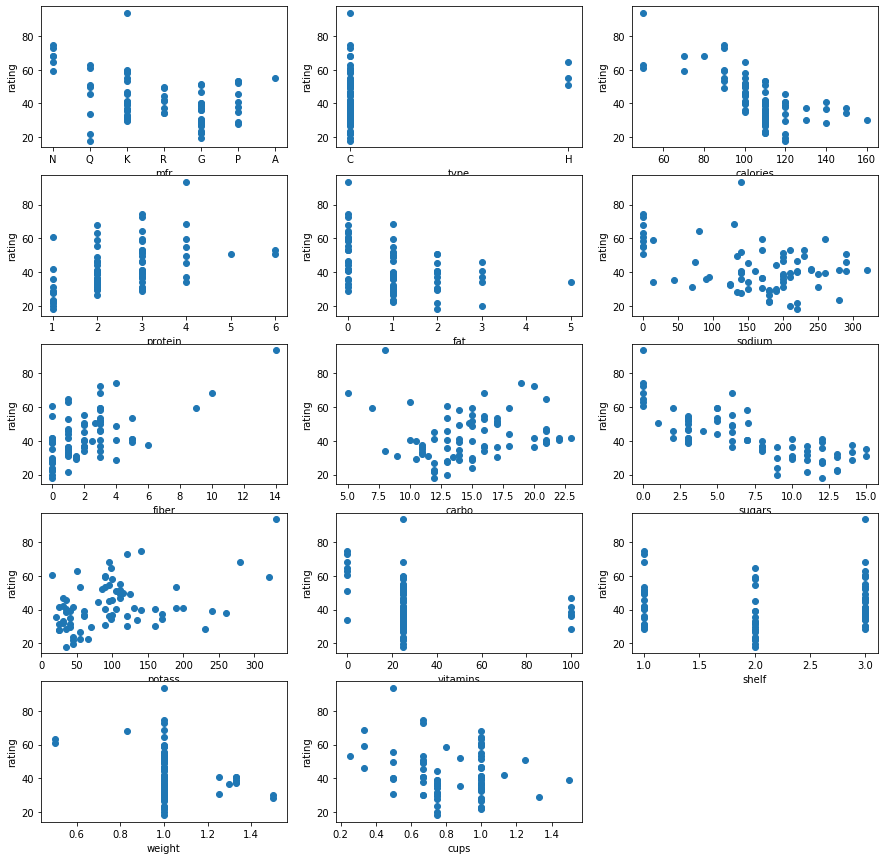

In [80]:
cereal_target_name = "rating"
cereal_target = cereal_data[cereal_target_name]
fig = plt.figure(figsize=(15,15))

# Enumerate function gives index and the value
for (i, column) in enumerate(cereal_data.columns, 0): # Enumerates each column label with .columns from Pandas
    if(column == cereal_target_name) or (column == "name"): # If the name of cereal or target_name a.k.a. the comparison comes up, do not include. Keep going.
        continue # Tells the enumerator not to create a plot including the same x and y axis. i.e. rating vs. rating
    print(i, column) # Visual representation of the enumerate function in Python
    plt.subplot(5,3,i) # Creates subplot with 5 rows and 3 columns for each enumeration i. Included in for loop which is why i is counted.
    plt.scatter(cereal_data[column], cereal_data[cereal_target_name]) # Plots the column vs. the target name. x vs. y.
    plt.xlabel(column) # Label the x and y axis
    plt.ylabel(cereal_target_name)

plt.show() # Necessary to show the plots

Notice a weak linear relationship between rating and sugar.
Positive linear relationship between rating and fiber.

In [82]:
# Test using enumeration and list

my_list = ['apple', 'banana', 'grapes', 'pear']
counter = (enumerate(my_list, 1))
for c, v in counter:
    print (c, v) 
counter_list = list(enumerate(my_list, 1))
print(counter_list)
# Output: [(1, 'apple'), (2, 'banana'), (3, 'grapes'), (4, 'pear')]

1 apple
2 banana
3 grapes
4 pear
[(1, 'apple'), (2, 'banana'), (3, 'grapes'), (4, 'pear')]


Visualization via heatmap using seaborn.
- Seaborn is a plotting library similar to matplotlib
- Library for visualizing stastical data

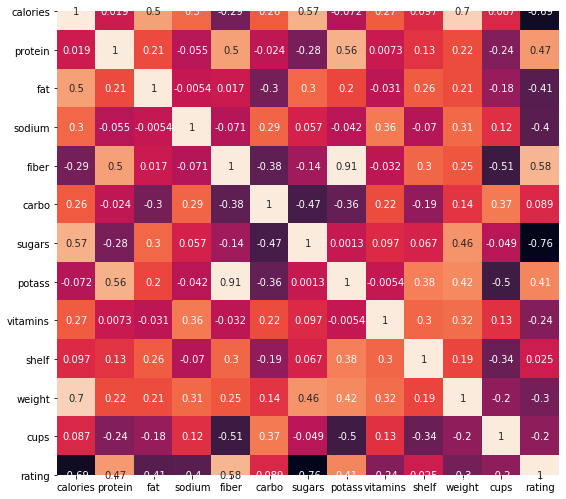

In [106]:
import seaborn as sns
corrmat = cereal_data.corr()
#print (corrmat)
(f, ax) = plt.subplots(figsize=(9,9)) # Creates the plot AND adds the correcsponding color for 99i.
f = sns.heatmap(corrmat, vmax=.8, square=True, annot=True, cbar=False)

Each square is a plot. Think of it as a 9x9 grid of plots, where each plot is a color corresponding with the relationship value.